In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from numpy import arange

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import sklearn.metrics as sm
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

ModuleNotFoundError: No module named 'numpy'

In [2]:
#Focusing on 100 choices from 200 subjects as a first step
choice = pd.read_csv('IGTdataSteingroever2014\choice_150.csv')

In [3]:
#All data types are the same and the original matrix is clean
choice.dtypes

Choice_1      int64
Choice_2      int64
Choice_3      int64
Choice_4      int64
Choice_5      int64
              ...  
Choice_146    int64
Choice_147    int64
Choice_148    int64
Choice_149    int64
Choice_150    int64
Length: 150, dtype: object

In [4]:
cluster = KMeans(n_clusters = 5)
cols = choice.columns[:]
cols

Index(['Choice_1', 'Choice_2', 'Choice_3', 'Choice_4', 'Choice_5', 'Choice_6',
       'Choice_7', 'Choice_8', 'Choice_9', 'Choice_10',
       ...
       'Choice_141', 'Choice_142', 'Choice_143', 'Choice_144', 'Choice_145',
       'Choice_146', 'Choice_147', 'Choice_148', 'Choice_149', 'Choice_150'],
      dtype='object', length=150)

In [5]:
choice["cluster"] = cluster.fit_predict(choice[choice.columns[1:]])
choice.head()
choice.tail()

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_142,Choice_143,Choice_144,Choice_145,Choice_146,Choice_147,Choice_148,Choice_149,Choice_150,cluster
Subj_94,1,2,1,1,1,3,4,4,4,4,...,2,4,4,4,4,4,4,4,4,2
Subj_95,3,4,4,4,4,2,1,1,2,4,...,3,4,3,3,3,3,3,3,3,1
Subj_96,4,4,2,1,3,1,3,4,4,3,...,4,3,2,4,4,3,4,1,4,2
Subj_97,2,2,3,4,1,3,2,4,3,3,...,4,4,1,4,3,4,4,4,4,2
Subj_98,4,3,4,4,4,1,2,1,2,2,...,4,2,2,2,4,2,2,4,2,3


In [6]:
pca = PCA(n_components = 2)
choice["x"] = pca.fit_transform(choice[cols])[:,0]
choice["y"] = pca.fit_transform(choice[cols])[:,1]
choice = choice.reset_index()
choice.tail()

,index,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,...,Choice_144,Choice_145,Choice_146,Choice_147,Choice_148,Choice_149,Choice_150,cluster,x,y
93,Subj_94,1,2,1,1,1,3,4,4,4,...,4,4,4,4,4,4,4,2,-3.300828,4.664431
94,Subj_95,3,4,4,4,4,2,1,1,2,...,3,3,3,3,3,3,3,1,5.796755,0.908372
95,Subj_96,4,4,2,1,3,1,3,4,4,...,2,4,4,3,4,1,4,2,5.370254,2.093799
96,Subj_97,2,2,3,4,1,3,2,4,3,...,1,4,3,4,4,4,4,2,1.231908,0.832434
97,Subj_98,4,3,4,4,4,1,2,1,2,...,2,2,4,2,2,4,2,3,-4.888542,-1.482300


In [7]:
df = choice[["index", "cluster", "x", "y"]]
df.columns = ["Subjects", "Cluster", "X", "Y"]
df.head()

,Subjects,Cluster,X,Y
0,Subj_1,3,-3.765903,-1.825176
1,Subj_2,3,-5.743656,1.383064
2,Subj_3,2,4.381635,6.055623
3,Subj_4,4,10.219133,-5.785868
4,Subj_5,4,12.807958,-0.439170


<AxesSubplot:xlabel='X', ylabel='Y'>

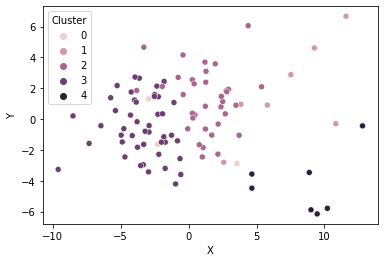

In [8]:
import seaborn as sns
sns.scatterplot(data=df,x="X", y="Y", hue="Cluster")

In [9]:
#Now that we have looked at the different choices that have been made we can take a look at the results
win = pd.read_csv('IGTdataSteingroever2014\wi_150.csv')
loss = pd.read_csv("IGTdataSteingroever2014\lo_150.csv")
index = pd.read_csv("IGTdataSteingroever2014\index_150.csv")

In [10]:
win.tail(5)

,Wins_1,Wins_2,Wins_3,Wins_4,Wins_5,Wins_6,Wins_7,Wins_8,Wins_9,Wins_10,...,Wins_141,Wins_142,Wins_143,Wins_144,Wins_145,Wins_146,Wins_147,Wins_148,Wins_149,Wins_150
Subj_94,100,100,100,100,100,50,50,50,50,50,...,100,100,50,50,50,50,50,50,50,50
Subj_95,50,50,50,50,50,100,100,100,100,50,...,50,50,50,50,50,50,50,50,50,50
Subj_96,50,50,100,100,50,100,50,50,50,50,...,100,50,50,100,50,50,50,50,100,50
Subj_97,100,100,50,50,100,50,100,50,50,50,...,50,50,50,100,50,50,50,50,50,50
Subj_98,50,50,50,50,50,100,100,100,100,100,...,100,50,100,100,100,50,100,100,50,100


In [11]:
loss.tail(5)

,Losses_1,Losses_2,Losses_3,Losses_4,Losses_5,Losses_6,Losses_7,Losses_8,Losses_9,Losses_10,...,Losses_141,Losses_142,Losses_143,Losses_144,Losses_145,Losses_146,Losses_147,Losses_148,Losses_149,Losses_150
Subj_94,-250,0,0,0,-150,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Subj_95,-50,0,0,0,0,0,0,-200,-1250,0,...,0,-50,0,-50,0,0,-50,0,-50,0
Subj_96,0,-250,0,-300,-50,-200,-50,0,0,0,...,0,0,-50,0,0,0,-50,0,-200,-250
Subj_97,0,-1250,0,0,0,-50,0,0,0,-50,...,0,0,0,-200,-250,-50,0,0,0,0
Subj_98,0,-50,0,0,0,0,0,-150,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
choice.tail(5)

,index,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,...,Choice_144,Choice_145,Choice_146,Choice_147,Choice_148,Choice_149,Choice_150,cluster,x,y
93,Subj_94,1,2,1,1,1,3,4,4,4,...,4,4,4,4,4,4,4,2,-3.300828,4.664431
94,Subj_95,3,4,4,4,4,2,1,1,2,...,3,3,3,3,3,3,3,1,5.796755,0.908372
95,Subj_96,4,4,2,1,3,1,3,4,4,...,2,4,4,3,4,1,4,2,5.370254,2.093799
96,Subj_97,2,2,3,4,1,3,2,4,3,...,1,4,3,4,4,4,4,2,1.231908,0.832434
97,Subj_98,4,3,4,4,4,1,2,1,2,...,2,2,4,2,2,4,2,3,-4.888542,-1.482300


In [13]:
choice_new = choice.apply(pd.Series.value_counts, axis=1)
choice_new["SubjectId"] = choice["index"]
cols = list(choice_new.columns)
cols = [cols[-1]] + cols[:-1]
choice_new = choice_new[cols]
choice_new.drop(choice_new.iloc[:, 5:], inplace = True, axis = 1)
choice_new.columns = ["Subject_id", "A", "B", "C", "D"]
choice_new.fillna(value = 0, inplace = True)
choice_new.A = choice_new.A.astype(int)
choice_new.B = choice_new.B.astype(int)
choice_new.C = choice_new.C.astype(int)
choice_new.D = choice_new.D.astype(int)
choice_new.head()

,Subject_id,A,B,C,D
0,Subj_1,46,37,30,38
1,Subj_2,40,57,20,34
2,Subj_3,19,36,8,88
3,Subj_4,18,11,10,112
4,Subj_5,13,1,1,136
